In [17]:
!gdown --id 11srKV5kCq6E8FAuQLk6EUaS0pFXX_YDq

/usr/local/python/3.12.1/lib/python3.12/site-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=11srKV5kCq6E8FAuQLk6EUaS0pFXX_YDq
To: /workspaces/BioFast/small_SRR1971253.fastq
100%|██████████████████████████████████████| 84.1k/84.1k [00:00<00:00, 23.4MB/s]


In [30]:
!pip install gdown

In [31]:
!pip install biopython 

In [18]:
import pandas as pd
from Bio import SeqIO
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
from Bio import SeqIO
import pandas as pd

def extract_data(file_path):
    sequences = []
    for record in SeqIO.parse(file_path, "fastq"):
        sequences.append({
            "id": record.id,
            "seq": str(record.seq),
            "quality": record.letter_annotations["phred_quality"]
        })
    return pd.DataFrame(sequences)

def transform_data(df):
    quality_threshold = 20
    df['mean_quality'] = df['quality'].apply(lambda q: sum(q) / len(q) if len(q) > 0 else 0)
    return df[df['mean_quality'] >= quality_threshold]

def load_data(df):
    print(df.head())

fastq_file_path = 'small_SRR1971253.fastq'
df_sequences = extract_data(fastq_file_path)
df_transformed = transform_data(df_sequences)
load_data(df_transformed)

                 id                                                seq  \
0  SRR1971253.55828  GTCCCATTTACCTCTGACTCTTTTGATGCTGCAATTGCTGCTCATA...   
1  SRR1971253.37947  TGGTCGACGATTTCAACCCCTGGTCGACCATTCCTCGAACCCGATA...   
2  SRR1971253.15442  AGGTGCGGGTTACTCCCCTACTTAATAGTATAGATATTGATGGTCA...   
3  SRR1971253.31075  GCTGAAATCGCCCAATTCGATGATGAAATCCGGCTTTTCCTTTTTC...   
4   SRR1971253.4534  CGTCGACGGCGGCATCTTTGAGGAGGTAGCCACGGGCGCCTTTTTC...   

                                             quality  mean_quality  
0  [30, 31, 31, 35, 35, 35, 35, 35, 39, 35, 37, 3...         35.72  
1  [33, 34, 34, 35, 37, 37, 37, 37, 39, 39, 39, 3...         39.16  
2  [33, 34, 34, 37, 37, 37, 37, 37, 39, 37, 39, 3...         39.42  
3  [34, 34, 34, 37, 37, 37, 37, 37, 39, 39, 39, 3...         39.94  
4  [34, 34, 31, 37, 37, 37, 37, 37, 39, 39, 39, 3...         37.42  


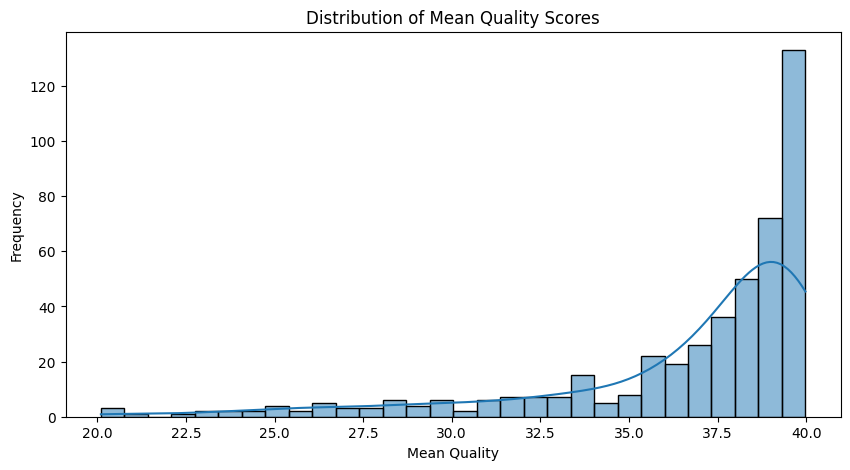

In [27]:
plt.figure(figsize=(10, 5))
sns.histplot(df_transformed['mean_quality'], bins=30, kde=True)
plt.title('Distribution of Mean Quality Scores')
plt.xlabel('Mean Quality')
plt.ylabel('Frequency')
plt.show()

In [29]:
import plotly.express as px

fig = px.histogram(
    df_transformed,
    x='mean_quality',
    nbins=30,
    title='Distribution of Mean Quality Scores',
    color_discrete_sequence=['#636EFA'], 
    opacity=0.7  
)
fig.update_layout(
    title={
        'text': 'Distribution of Mean Quality Scores',
        'y':0.9,  
        'x':0.5, 
        'xanchor': 'center',
        'yanchor': 'top'
    },
    xaxis_title='Mean Quality',
    yaxis_title='Frequency',
    template='plotly_white'
)
mean_value = df_transformed['mean_quality'].mean()
fig.add_vline(x=mean_value, line_dash="dash", line_color="red", annotation_text="Mean", annotation_position="top right")

fig.show()
